# Histogram Equalization

#### Preparing Work

In [1]:
from PIL import Image
from pylab import *

myim = array(Image.open(r"images/sub8x8.jpg").convert('L'))
I = myim.flatten()

# Display the image we work on 
print shape(myim)
figure(figsize=(8,8))
imshow(myim, cmap=cm.gray)

(8L, 8L)


### [1] Building The Histogram Of Our Image

In [2]:
'''
In our histogram-dictionary h, Keys are pixels and values are frequencies
For each pixel p in our image I,
    if p doesn't exist in keys,
        then, add p as a new key and assign 1 to its value.
    Otherwise, increment the value of that key

The size of histogram should be 255 since we work on Grayscale image
'''
h = dict()
for p in I:
    if not h.has_key(p):
        h[p]=1
    else:
        h[p]+=1

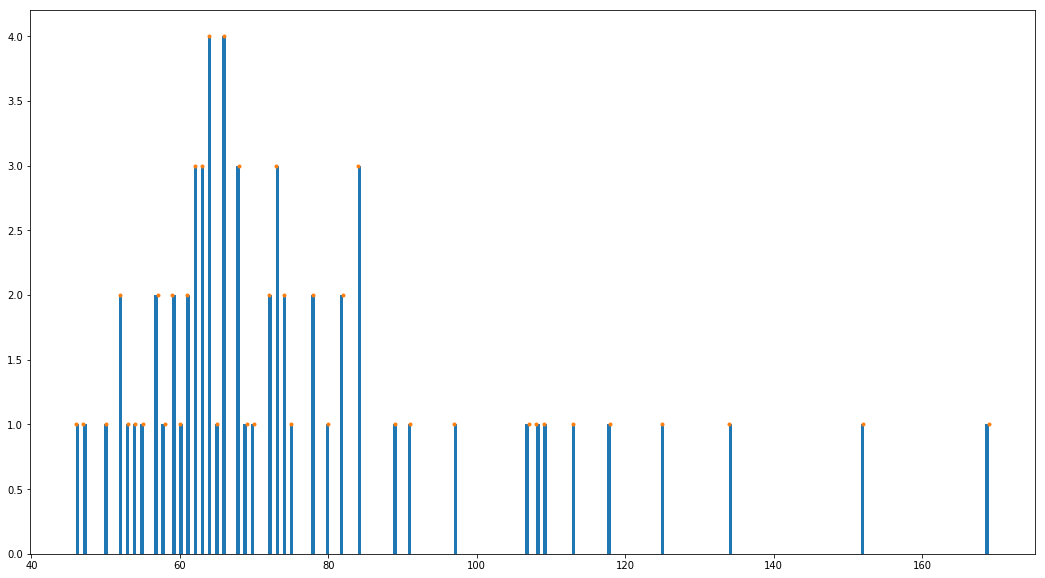

In [3]:
'''
Comparing our resulted Histogram with 'matplotlib.pyplot.hist' result
'''

figure(figsize=(18,10))
subplot()
hist(I,256)
# Ours
plot(h.keys(), h.values(),'.')


### [2] Sorting The Result By Ascending

In [4]:

h_sorted = sorted(h.items())

### [3] Computing The Comulative Distribution 

In [5]:
'''
Assumig a history r variable -for holding the comulative-distribution, with an initial value of 0
For each pixel p in the sorted histogram h,
    add the frequency of p to r and store the result in r
    assign r to the comulative-distribution of p

The last value of the Comulative Distribution should equals to the total number of pixels in our image -width*height. 
'''
#comulative_dist
r=0
cdf = list()
for p in h_sorted:
    r += p[1]
    cdf.append([p[0], r])

### [4] Normalization h(v), Equalized v

In [6]:
'''
Calculating the Normalization function 
'''
from __future__ import division

scale=255 #gray image
cdf_min = cdf[0][1] #first cdf(v) vaule
cdf_max = cdf[-1][1] #last value
d = cdf_max - cdf_min #denominator

eq_v = list() #equalized result
for p in cdf: #'p' consists of (v,cdf(v))
    cdf_v = p[1]
    n = cdf_v - cdf_min #numerator
    h_v = round((n/d) * scale) # the equalized v
    eq_v.append([p[0], h_v])

### [5] Putting Things Together

In [7]:
'''
Applying/placing The New Intensity
Scan row by row
    For each Pixel p -with old intensity, in our original image,
        find the corresponding -equalized v value h(v) of p
        and assign it to p
'''
hv = dict(eq_v) #dictionaries are easy in searching and indexing
im_inhanced = myim.copy()

n_rows = len(im_inhanced) # the image height
row_width = len(im_inhanced[0])

for row in range(n_rows):
    for vi in range(row_width):
        v = im_inhanced[row][vi]
        im_inhanced[row][vi] = hv[v] 

## The Result

(<matplotlib.image.AxesImage at 0x8c6df60>, Text(0.5,1,'Original'))

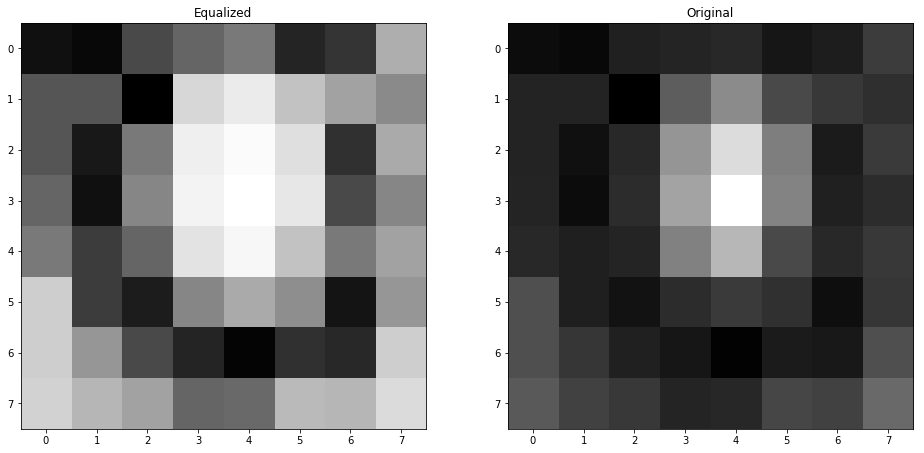

In [8]:
fig, (ax1, ax2) = subplots(1,2,figsize=(16,16))
ax1.imshow(im_inhanced, cmap=cm.gray),ax1.set_title('Equalized')
ax2.imshow(myim, cmap=cm.gray),ax2.set_title('Original')

Wall time: 553 ms


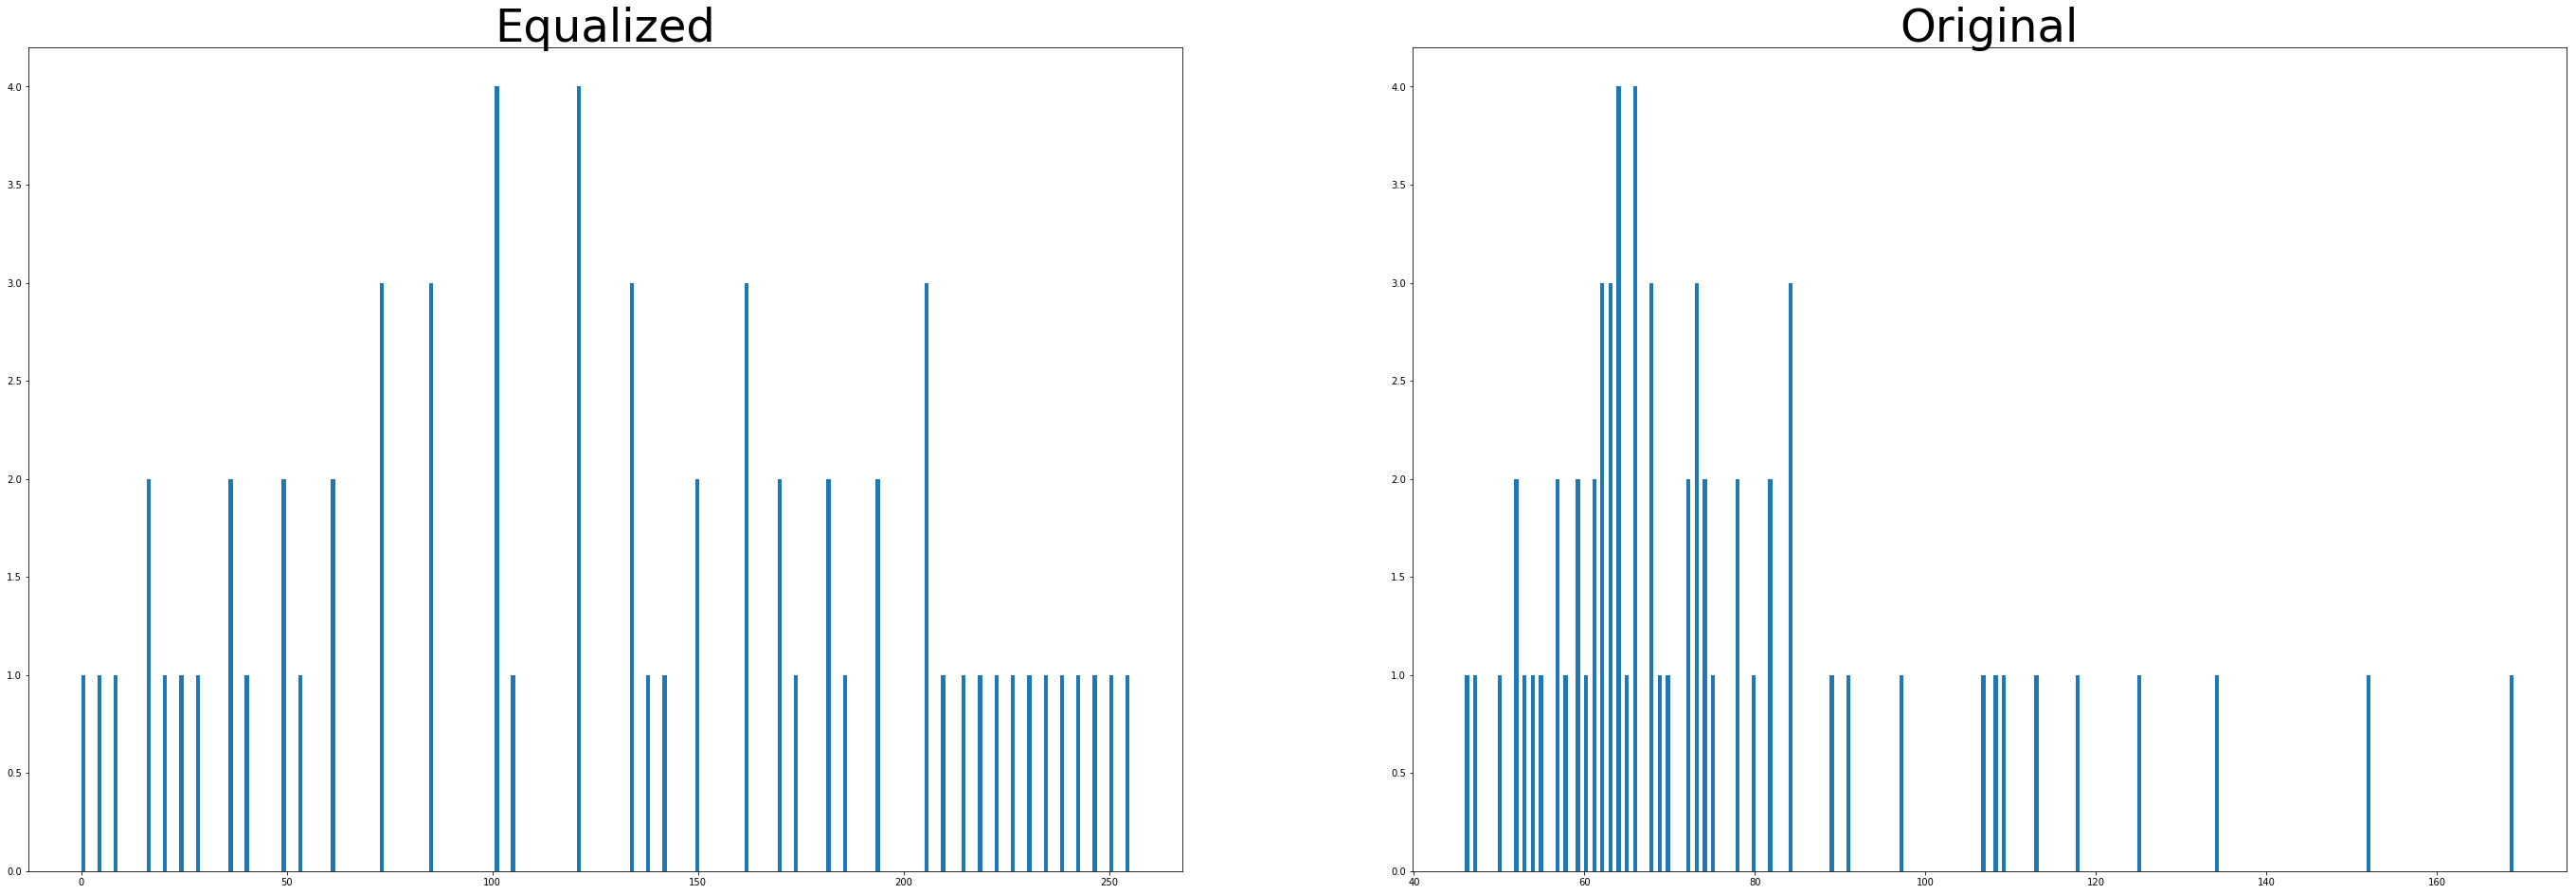

In [9]:
%%time
figure(figsize=(48,16))
subplot(121),hist(im_inhanced.flatten(),256),title('Equalized', size=48)
subplot(122),hist(I,256),title('Original', size=48)